Analytical GRAPE for QFI

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as scylin
from time import time
import os
from datetime import datetime

#from Dynamics.dynamics import Lindblad
from Dynamics.analytical_GRAPE import ana_GRAPE
#from Control.GRAPE_without_adam import GRAPE_without_adam
from Common.common import mat_vec_convert,  dRHO

omega0 = 1.0
gamma = [0.05]
T = 5.0
tnum = int(250*T)
tspan = np.linspace(0, T, tnum)
dt = tspan[1]-tspan[0]
cnum = tnum
vx = 0.0*np.ones(cnum)
vy = 0.0*np.ones(cnum)
vz = 0.0*np.ones(cnum)

sx = np.array([[0.+0.j, 1.+0.j],[1.+0.j, 0.+0.j]])  
sy = np.array([[0.+0.j, 0.-1.j],[0.+1.j, 0.+0.j]]) 
sz = np.array([[1.+0.j, 0.+0.j],[0.+0.j, -1.+0.j]])
sp, sm = 0.5*(sx+1.j*sy), 0.5*(sx-1.j*sy)

#initial state
psi0 = np.array([[1.+0.j],[0.+0.j]])
psi1 = np.array([[0.+0.j],[1.+0.j]])
psi_p = (psi0+psi1)/np.sqrt(2)
psi_m = (psi0-psi1)/np.sqrt(2)
rho0 = np.dot(psi_p, psi_p.conj().T)
dim = len(rho0)

#time independent Hamiltonian
H0 = 0.5*omega0*sz
dH0 = [0.5*sz]

#control Hamiltonian
Hc_ctrl = [sx,sy,sz]
Hc_coeff = [vx,vy,vz]

#measurement
M1 = np.dot(psi_p, psi_p.conj().transpose())
M2 = np.dot(psi_m, psi_m.conj().transpose())
M  = [M1, M2]

Lvec = [sm]

GRAPE = ana_GRAPE(tspan, rho0, H0, Hc_ctrl, dH0, Hc_coeff, Lvec, gamma)
episode = 1000
save_num = 1

t1 = time()
F = []
f_pre = 0.0
for round_i in range(episode):
    GRAPE.GRAPE_QFI()
        
    f = GRAPE.Ffinal
    rho = GRAPE.rho
    drho = GRAPE.drho
    
    F.append(f)
    print(round_i,f)
t2 = time()
print(t2-t1)


0 10.82905980608914


In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

QFI_ana = np.load("qfi_ana.npy")
QFI_ana_1 = np.loadtxt("qfi_ana_j.txt")
QFI_auto = np.loadtxt("qfi_auto.txt")

# QFI = np.concatenate((QFI_ana, QFI_ana_1))
# ctrl = np.concatenate((ctrl_ana, ctrl_ana_1),axis=0)
# print(len(QFI))
# print(len(ctrl))

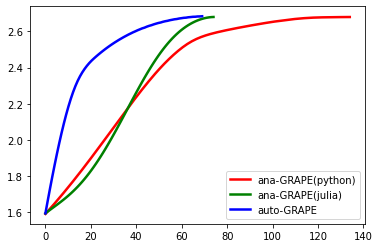

In [3]:
plt.plot(np.linspace(0, len(QFI_ana), len(QFI_ana)), QFI_ana, 'r-', linewidth=2.5, label='ana-GRAPE(python)')
plt.plot(np.linspace(0, len(QFI_ana_1), len(QFI_ana_1)), QFI_ana_1, 'g-', linewidth=2.5, label='ana-GRAPE(julia)')
plt.plot(np.linspace(0, len(QFI_auto), len(QFI_auto)), QFI_auto, 'b-', linewidth=2.5, label='auto-GRAPE')
plt.legend(loc=0)

Analytical GRAPE for QFIM

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as scylin
from time import time
import os
from datetime import datetime

from Dynamics.analytical_GRAPE import ana_GRAPE
from Common.common import mat_vec_convert,  dRHO

x1 = 1.0
x2 = 1.2
gamma1 = 0.05
gamma2 = 0.05
gamma = [gamma1, gamma2]
T = 2.0
tnum = int(250*T)
tspan = np.linspace(0, T, tnum)
dt = tspan[1]-tspan[0]

cnum = tnum
vx = 0.5*np.ones(cnum)
vy = 0.5*np.ones(cnum)
#vz = 0.5*np.ones(cnum)

sx = np.array([[0.+0.j, 1.+0.j],[1.+0.j, 0.+0.j]])  
sy = np.array([[0.+0.j, 0.-1.j],[0.+1.j, 0.+0.j]]) 
sz = np.array([[1.+0.j, 0.+0.j],[0.+0.j, -1.+0.j]])
ide = np.array([[1.+0.j,0.+0.j],[0.+0.j,1.+0.j]])   
sx1, sx2 = np.kron(sx,ide), np.kron(ide,sx)
sy1, sy2 = np.kron(sy,ide), np.kron(ide,sy)
sz1, sz2 = np.kron(sz,ide), np.kron(ide,sz)

#initial state
psi0 = np.array([[1.+0.j],[0.+0.j]])
psi1 = np.array([[0.+0.j],[1.+0.j]])
psi = (np.kron(psi0,(psi0+1j*psi1)))/np.sqrt(2)
rho0 = np.dot(psi, psi.conj().T)
dim = len(rho0)

#time independent Hamiltonian
H0 = -x1*(np.dot(sx1,sx2)+np.dot(sy1,sy2))-x2*np.dot(sz1,sz2)
dH_1 = -(np.dot(sx1,sx2)+np.dot(sy1,sy2))
dH_2 = -np.dot(sz1,sz2)
dH0 = [dH_1, dH_2]
Hc_ctrl = [sz1, sz2]
Hc_coeff = [vx, vy]

#measurement
psi_p = (psi0+psi1)/np.sqrt(2)
psi_m = (psi0-psi1)/np.sqrt(2)
M1 = np.dot(np.kron(psi_p,psi_p), np.kron(psi_p,psi_p).conj().transpose())
M2 = np.dot(np.kron(psi_p,psi_m), np.kron(psi_p,psi_m).conj().transpose())
M3 = np.dot(np.kron(psi_m,psi_p), np.kron(psi_m,psi_p).conj().transpose())
M4 = np.dot(np.kron(psi_m,psi_m), np.kron(psi_m,psi_m).conj().transpose())
M  = [M1, M2, M3, M4]

Lvec = [sz1, sz2]

GRAPE = ana_GRAPE(tspan, rho0, H0, Hc_ctrl, dH0, Hc_coeff, Lvec, gamma)
episode = 10
save_num = 1

t1 = time()
F = []
f_pre = 0.0
for round_i in range(episode):
    #GRAPE.GRAPE_CFIM(M)
    GRAPE.GRAPE_QFIM()
        
    f = GRAPE.Ffinal
    rho = GRAPE.rho
    drho = GRAPE.drho
    
    #if f-f_pre<1e-4:
        #break
    #f_pre = f
    f_tp = np.trace(np.linalg.inv(f))
    F.append(f_tp)
    print(round_i,f_tp)
t2 = time()
print(t2-t1)


0 0.13180615214484964
1 0.131806152144851
2 0.13180615214485011


Analytical GRAPE for CFI

In [2]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as scylin
from time import time
import os
from datetime import datetime

#from Dynamics.dynamics import Lindblad
from Dynamics.analytical_GRAPE import ana_GRAPE
#from Control.GRAPE_without_adam import GRAPE_without_adam
from Common.common import mat_vec_convert,  dRHO

omega0 = 1.0
gamma = [0.05]
T = 2.0
tnum = int(250*T)
tspan = np.linspace(0, T, tnum)
dt = tspan[1]-tspan[0]
cnum = tnum
vx = 0.5*np.ones(cnum)
vy = 0.5*np.ones(cnum)
vz = 0.5*np.ones(cnum)

sx = np.array([[0.+0.j, 1.+0.j],[1.+0.j, 0.+0.j]])  
sy = np.array([[0.+0.j, 0.-1.j],[0.+1.j, 0.+0.j]]) 
sz = np.array([[1.+0.j, 0.+0.j],[0.+0.j, -1.+0.j]])
sp, sm = 0.5*(sx+1.j*sy), 0.5*(sx-1.j*sy)

#initial state
psi0 = np.array([[1.+0.j],[0.+0.j]])
psi1 = np.array([[0.+0.j],[1.+0.j]])
psi_p = (psi0+psi1)/np.sqrt(2)
psi_m = (psi0-psi1)/np.sqrt(2)
rho0 = np.dot(psi_p, psi_p.conj().T)
dim = len(rho0)

#time independent Hamiltonian
H0 = 0.5*omega0*sz
dH0 = [0.5*sz]

#control Hamiltonian
Hc_ctrl = [sx,sy,sz]
Hc_coeff = [vx,vy,vz]

#measurement
M1 = np.dot(psi_p, psi_p.conj().transpose())
M2 = np.dot(psi_m, psi_m.conj().transpose())
M  = [M1, M2]

Lvec = [sz]

GRAPE = ana_GRAPE(tspan, rho0, H0, Hc_ctrl, dH0, Hc_coeff, Lvec, gamma)
episode = 1000
save_num = 1

t1 = time()
F = []
f_pre = 0.0
for round_i in range(episode):
    GRAPE.GRAPE_CFI(M)
        
    f = GRAPE.Ffinal
    rho = GRAPE.rho
    drho = GRAPE.drho
    
    if np.abs(f-f_pre)<1e-4:
        break
    f_pre = f
    F.append(f)
    print(round_i,f)
t2 = time()
print(t2-t1)


0 1.18608062382911
1 1.19091086789673
2 1.1953300393237452
3 1.1997533867101122
4 1.2041831961203584
5 1.208621321359134
6 1.2130693775739276
7 1.2175287711349037
8 1.2220007260427233
9 1.2264863072486785
10 1.2309864411975928
11 1.2355019338818325
12 1.2400334866741538
13 1.244581710184311
14 1.249147136363247
15 1.2537302290573793
16 1.2583313931956535
17 1.2629509827736163
18 1.267589307780704
19 1.2722466402015697
20 1.2769232192072228
21 1.2816192556385229
22 1.286334935872448
23 1.2910704251512017
24 1.295825870443625
25 1.3006014029006763
26 1.3053971399586841
27 1.3102131871372225
28 1.3150496395726456
29 1.3199065833226575
30 1.324784096473528
31 1.329682250076368
32 1.3346011089361467
33 1.3395407322736037
34 1.3445011742777173
35 1.34948248456389
36 1.3544847085508769
37 1.3595078877680669
38 1.3645520601025314
39 1.3696172599944303
40 1.3747035185882557
41 1.379810863845573
42 1.3849393206252412
43 1.3900889107352645
44 1.3952596529605108
45 1.4004515630691237
46 1.40566465